# 9 Optimal growth 1: the stochastic optimal growth model

In [55]:
!pip install --upgrade quantecon
!pip install interpolation

Requirement already up-to-date: quantecon in /Users/shuhu/anaconda3/lib/python3.7/site-packages (0.4.5)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from interpolation import interp
from numba import njit, prange
from quantecon.optimize.scalar_maximization import brent_max

# 1 Overview

In this lecture, we are going to study a simple version of the standard one sector infinite horizon growth model studied in the reference ().

We use dynamic programming to solve the model, similar to earlier lectures, but we we will discuss the technical details. 

# 2 Model

1. Consider an agent who owns an amount $y_t \in \mathbb R_+=[0, \infty)$ of a consumption good at time $t$.

   - This output can either be consumed or invested.

2. When the good is invested, it is transformed one-for-one capital (?).

   - The resulting capital stock, denoted here by $k_{t+1}$, will then be used for production.
   - Production is stochastic, in that it is also depends on a shock $\xi_{t+1}$ realized at the end of the current period.

3. Next period output is
   $$
   y_{t+1} = f(k_{t+1}) \xi_{t+1} \tag{1}
   $$

   - where $f: \mathbb R_+ \to \mathbb R_+$ called the production function.

4. The resource constrain is
   $$
   k_{t+1} + c_t \leq y_t \tag{2}
   $$

   - where all variables are required to be nonnegative.

## 2.1 Assumptions and comments

1. The sequence $\{\xi_t\}$ is assumed to be IID.
2. The common distribution of each $\xi_t$ will be denoted by $\phi$.
3. The production function $f$ is assumed to be increasing and continuous.
4. Depreciation of capital is not made explicit but can be incorporated into the production function.

### Remark

1. While many other treatments of the stochastic growth model use $k_t$ as the state variable, we will use $y_t$.
   - This will allow us to treat a stochastic model, while maintaining only one state variable.
2. We will consider alterntive states and timing-specifications in some other lectures.

## 2.2 Optimization

1. Taking $y_0$ as given, the agent wishes to maximise
   $$
   \mathbb E [\sum^{\infty}_{t=0} \beta^t u(c_t)] \tag{3}
   $$
   Subject to
   $$
   y_{t+1} = f(y_t - c_t) \xi_{t+1} \ and \ 0 \leq c_t \leq y_t \ for \ all \ t \tag{4}
   $$
   where

   - $u$ is a bounded, continous and strictly increasing utility function and
   - $\beta \in (0,1)$ is a discount factor.

2. In [(4)](#), we assume that the resource constraint [(2)](#) holds with equality (binding)

   - Because $u$ is strictly increasing and no output will be wasted at the optimum.

3. In summary, the agent's aim is to select a path $c_0, c_1, c_2, \cdots$ for consumption that is

   - Nonnegative,
   - Feasible in the sense of [(2)](#),
   - Optimal, in the sense that it maximises [(3)](#) relative to all other feasible consumption sequences, and
   - adapted, in the sense that the action $c_t$ depends only on observable outcomes, not on future outcomes such as $\xi_{t+1}$.

4. In the present context

   - $y_t$ is called the state variable.
     - It summarizes the "state of the world" at the start of each period.
   - $c_t$ is called teh control variable.
     - a value chosen by the agent each period after observing the state.

## 2.3 The policy function approach***

1. One way to think about solving this problem is to look for the best policy function.

2. A policy function is a map from past and present observables into current action.

   - Markov policies are maps from the current state $y_t$ into a current action $c_t$.
     - That is, the current state $y_t$ provides a sufficient statistic for the history in terms of making an optimal decision today.
     - we have proofs in reference.

3. Finding the best Markov policy.

   - A markov policy is a function $\sigma : \mathbb R_+ \to \mathbb R_+$, with the understanding that states are mapped to actions via
     $$
     c_t = \sigma (y_t) \ for \ all \ t \tag{5}
     $$

   - $\sigma$ is called a feasible consumption policy if it satisfies
     $$
     0 \leq \sigma (y) \leq y \ for \ all \ y \in \mathbb R_+ \tag{6}
     $$

     - That is, a feasible consumption policy is a Markove policy that represents the resource constraint.
     - The set of all feasible consumption policies will be denoted by $\sum$.

   - Each $\sigma \in \sum$ determines a continous state Markov process $\{ y_t \}$ (To be studied) for output via
     $$
     y_{t+1} = f(y_t - \sigma (y_{t})) \xi_{t+1}, \ y_0 \ given \tag{7}
     $$

     - This is the time path for output when we choose and stick with the policy $\sigma$.

   - We insert this process into the objective function to get
     $$
     \mathbb E [\sum^{\infty}_{t=0} \beta^t u(c_t)] = \mathbb E [\sum^{\infty}_{t=0} \beta^t u (\sigma (y_t))] \tag{8}
     $$

     - This is the total expected present value of following policy $\sigma$ forever, given initial income $y_0$.
     - Aim: to select a policy that makes this number as large as possible.

   



## 2.4 Optimality***

1. The $\sigma$ associated with a given policy $\sigma$ is the mapping defined by 
   $$
   v_{\sigma} (y) = \mathbb E[ \sum^{\infty}_{t=0} \beta^t u (\sigma (y_t))] \tag{9}
   $$
   when $\{y_t\}$ is given by [(7)](#) with $y_0 = y$.

   - That is, it is the lifetime value of following policy $\sigma$ starting at initial condition $y$.

2. The value functioin is defined as 
   $$
   v^*(y) = \sup_{\sigma \in \sum} v_{\sigma} (y) \tag{10}
   $$

   - The value function gives the maximal value that can be obtained from state $y$, after considering all feasible policies.
   - A poilcy $ \sigma \in \sum$ is called optimal if it attains the supremum in [(10)](#) for all $y\in \mathbb R_+$.

## 2.5 The Bellman equation

### Theorem

The value function $v^*$ satisfies the Bellmand equation.

1. With our assumptions on utility and production function, the value function defined in [(10)](#) satisfies a **Bellman equation**, which takes form
   $$
   v(y) = \max_{0 \leq c \leq y} \{ u(c) + \beta \int v(f(y-c)z) \phi (dz) \} \ ( y \in \mathbb R_+) \tag{11}
   $$

   - This is a functional equation in $v$.
   - The term $\int v(f(y-c)z) \phi (dz)$ can be understood as the expected next period value when
     - $v$ is used to measure value.
     - The state is $y$.
     - Consumption is set to $c$.

2. By the Theorem, [(11)](#) holds when $v=v^*$.

   - Intuition: maximal value from a given state can be obtained by optimally trading off
     - Current reward from a given action, vs
     - Expected discounted future value of the state resulting from the action.

### Remark

1. The Bellman equation is important because it gives us more information about the value function.
2. It also suggests a way of computing the value function, which we will discuss later.

## 2.6 Greedy policies

The primary importance of the value function is that we can use it to compute optimal policies.

1. Given a continuous function $v$ on $\mathbb R_+$, $\sigma \in \sum$ is $v-greedy$ if $\sigma (y)$ is a solution to
   $$
   \max_{0 \leq c \leq y} \{ u(c) + \beta \int v(f(y-c)z) \phi (dz) \} \tag{12}
   $$
   for every $y \in \mathbb R_+$.

   - $\sigma \in \sum$ is $v-greedy$ if it optimally trades off current and future rewards when $v$ is taken to be the value function.

2. Key result in our setting: A feasible consumption policy is optimal if and only if it is $v^*-greedy$.

   - Intuition simialr to that for the Bellman equation, provided after [(11)](#).

3. Once we have a good approximation to $v^*$, we can compute the (approximately) optimal policy by computing the corresponding greedy policy.

   - Advantage: we are now solving a much lower dimensional optimization problem.

## 2.7 The Bellman operator-way to compute value function

### Def.

An operator is a map that sends functions into functions.

1. The Bellman operator is denoted by $T$ and defined by
   $$
   Tv(y) = \max_{0 \leq c \leq y} \{ u(c) + \beta \int v(f(y-c)z) \phi (dz) \} \ ( y \in \mathbb R_+) \tag{13}
   $$

   - That is, $T$ sends the function $v$ into the new function $Tv$ defined by [(13)](#).

2. By construction, the set of solutions to the Bellman equation [(11)](#) exactly coincides with the set of fixed points of $T$.

   - e.g., if $Tv =v$, then for any $y\geq 0$,
     $$
     v(y) = Tv(y)= \max_{0 \leq c \leq y} \{ u(c) + \beta \int v(f(y-c)z) \phi (dz) \} \tag{14}
     $$

     - which says precisely that $v$ is a solutiion to the Bellman equation.

   - It follows that $v^*$ is a fixed point of $T$.

## 2.8 Review of theoretical results

1. We can show that $T$ is a contraction mapping on the set of continuous bounded functions on $ \mathbb R_+ $ under the supremum distance
   $$
   \rho (g, h) = \sup_{y \geq 0} |g(y) - h(y)| \tag{15}
   $$

2. By Banach FP theorem, it has exactly one fixed point in this set (**? why exactly one**), which shoud be equal to the value function.

   - The value function $v^*$ is bounded and continous.
   - Starting from any bounded and continous $v$, the sequences $v, Tv, T^2v, \cdots$ generated by iteratively applying $T$ converges uniformly to $v^*$.
     - This iterative method is called the value function iteration.

3. Since we also know that a feasible policy is optimal iff it is $v^*-greedy$, we can show that a $v^*-greedy$ policy exists.

   - See reference

4. At least one optimal policy exists.

   - Our problem now is how to compute it.

## 2.9 Unbounded utility

1. The result stated above assume that the utility function is bounded.
   - In practice, economists often work with unbounded utility functions.
2. In the unbounded setting, various optimaly theories exist, but they tend to be case-specific, as opposed to valid for a large range of applications.
   - Their main conclusions are usually in line with those stated for the bounded case just above.
   - See reference.

# 3 Computation

## 3.1 Fitted value iteration

1. Algorithm
   - Begin with an array of values $\{ v_1, ..., v_l \}$ representing the values of some initial function $v$ on the grid points $\{y_1, \cdots, y_l \}$.
   - Build a function $\hat v$ on the state space $\mathbb R_+$ by interpolation or approximation, based on these data points.
   - Obtain and record the value $T\hat v (y_i)$ on each grid point $y_i$ by repeatedly solving [(13)](#).
   - Unless some stopping condition is satisfied, set $\{ v_1, \cdots, v_l \}= \{ T\hat v(y_1), \cdots, T \hat v (y_l) \}$ and go to step 2.
2. The procedure is to record the value of the function $Tv$ at only finitely many "grid" points $y_1 < y_2 < \cdots < y_l$ and reconstruct it from this information when required.
   - The step 2 is a problem of function approximation, and there are many ways to approach it.
   - Important thing: the function approximation scheme must only only produce a good approximation to $Tv$, but also combine well with the broader iteration algorithm described before.
     - One good choice from both respects is continous piecewise linear interpolation (**To be checked**).
     - **Another advantage of piecewise linear interpolation** is that it preserves useful shape properties, such as monotonicity and concavity/convexity.

Next figure illustrates piecewise linear interpolation of an arbitrary function on grid points $0, 0.2, 0.4, 0.6, 0.8, 1$.

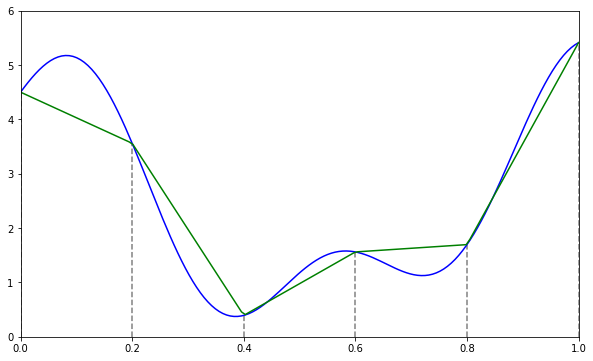

In [57]:
# define an arbitrary function
def f(x):
    y1 = 2 * np.cos(6 * x) + np.sin(14 * x)
    return y1 + 2.5

# how interp(work)
def Af(x):
    return interp(c_grid, f(c_grid), x)

c_grid = np.linspace(0, 1, 6)
f_grid = np.linspace(0, 1, 150)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(f_grid, f(f_grid), 'b-', label='true function')
ax.plot(f_grid, Af(f_grid), 'g-', label='linear approximation')
ax.vlines(c_grid, c_grid * 0, f(c_grid), linestyle = 'dashed', alpha = 0.5)

ax.set(xlim= (0,1), ylim=(0, 6))
plt.show()

## 3.2 Optimal growth model

Step 1: Store the values of the optimal growth model in a class.

Since the distribution $\phi$ of the shock is assumed to be lognormal, we have a draw from $\exp(\mu + \sigma \zeta)$, when $\zeta$ is standard normal.


In [58]:
class OptimalGrowthModel:
    
    def __init__(self,
                f, 
                u,
                β=0.96,
                μ=0,
                s=0.1,
                grid_max=4,
                grid_size=200,
                shock_size=250):
        
        self.β, self.μ, self.s = β, μ, s
        self.f, self.u = f, u
        
        self.grid = np.linspace(1e-5, grid_max, grid_size) # grid ?
        self.shocks = np.exp(μ + s * np.random.randn(shock_size)) # shock


## 3.3 The Bellman operator

Step 2: Define a function that generates a Bellman operator using linear interpolation.

Similarly with our previous lectures, we define a function called *operator_factory* that takes a class that represents the growth model and return the operator *T* (maximum) and a functon $get_greedy$ (maximizers) to solve the model.

Note that the expectation in [(13)](#) is computed via Monte Carlo, using the approximation (**To be checked?**)
$$
\int v(f(y-c)z) \phi )(dz) \approx \frac1n \sum^n_{i=1} v(f(y-c)\xi_i) \tag{16}
$$
where $\{ \xi_i \}^n_{i=1}$ are iid draws from $\phi$.

Monte Carlo is not always the most efficient way to compute integrals numerically but it does have some theoretical advantages in the present setting.

In [59]:
def operator_factory(og, parallel_flag=True):
    
    f, u, β = og.f, og.u, og.β
    grid, shocks = og.grid, og.shocks
    
    # Step 2 in 3.1
    @njit
    def objective(c, v, y):
        
        v_func = lambda x: interp(grid, v, x)
        return u(c) + β * np.mean(v_func(f(y - c) * shocks))
    
    # Step 3 in 3.1: get maximum; calculate the expectation via Monte Carlo approximaton(? What is that)
    @njit(parallel=parallel_flag)
    def T(v):
        
        v_new = np.empty_like(v)
        for i in prange(len(grid)):
            y = grid[i]
            v_max = brent_max(objective, 1e-10, y, args = (v, y))[1]
            v_new[i] = v_max
        return v_new
    
    # Step 3 in 3.1: get maximizer
    @njit
    def get_greedy(v):
        σ = np.empty_like(v)
        for i in range(len(grid)):
            y = grid[i]
            c_max = brent_max(objective, 1e-10, y, args = (v, y))[0]
            σ[i] = c_max
        return σ
    
    return T, get_greedy

## 3.4 An example

Consider a case where 

1. $f(k)= k^{\alpha}$
2. $u(c)= \ln c$
3. $\phi$ is the distribution of $\exp (\mu + \sigma \zeta)$ when $\zeta$ is standard normal.

As we know (See reference **?**), for this particular problem, an exact analytical solution should be
$$
v^* (y) = \frac{\ln ( 1- \alpha \beta)}{(1- \beta)} + \frac{\mu + \alpha \ln (\alpha \beta)}{1- \alpha} [\frac{1}{1-\beta} - \frac{1}{1-\alpha\beta}] + \frac{1}{1-\alpha \beta} \ln y \tag{17}
$$
and the optimal consumption policy is
$$
\sigma^* (y) = (1- \alpha \beta )y
$$
Define functions to compute the closed-form solutions to check our answers.

In [60]:
def σ_star(y, α, β):
    return (1 - α * β) * y

def v_star(y, α, β, μ):
    c1 = np.log(1 - α * β ) / ( 1 - β)
    c2 = (μ + α * np.log(α * β)) / (1 - α)
    c3 = 1 / ( 1 - β )
    c4 = 1 / ( 1 - α * β)
    return c1 + c2 * (c3 - c4) + c4 * np.log(y)

## 3.5 A first test

Aim: if we can replicate the analytical solution numerically, using fitted value function iteration.

Step 1: we can generate an instance of the model and generate its Bellman operator, with the code running above.

Step 1.1: Define a jitted version of the production function.

In [61]:
α = 0.4

@njit
def f(k):
    return k**α

Step 1.2: Create an instance of the model (Cobb-Douglas production function and log utility) and assign it to the variable *og*.

In [62]:
og = OptimalGrowthModel(f=f, u=np.log)
print(og)

Step 1.3: Use *og* to generate the Bellman operator and a function that computes greedy policies.

In [63]:
T, get_greedy = operator_factory(og)
print(T, get_greedy)

CPUDispatcher(<function operator_factory.<locals>.T at 0x7fe808953d90>) CPUDispatcher(<function operator_factory.<locals>.get_greedy at 0x7fe808953c80>)


Step 2: Do some tests.

Step 2.1: See what happens when we apply our Bellman operator to get the exact solution $v^*$. (In practice, we expect some small numberical errors.)

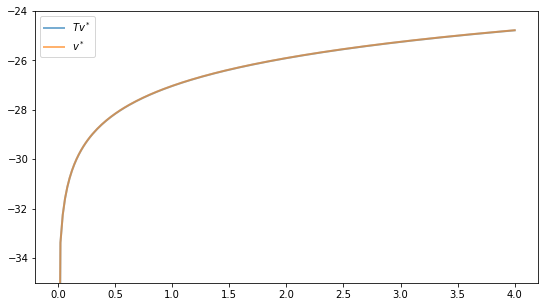

In [64]:
grid = og.grid
β, μ = og.β, og.μ

v_init = v_star(grid, α, β, μ)
v = T(v_init) # ?????? What is wrong? (Thanks to John's advice: it solved by updating the software.)

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_ylim(-35, -24)
ax.plot(grid, v, lw=2, alpha=0.6, label='$Tv^*$')
ax.plot(grid, v_init, lw=2, alpha=0.6, label='$v^*$')

ax.legend()
plt.show()

Step 2.2: Have a look at iterating with the Bellman operator, starting off from an arbitrary initial condition ($v(y) = 5 \ln (y)$).

The figure shows:

1. The first 36 functions generated by the fitted value function iteration algorithm, with hotter colors given to higher iterates.
2. The true value function $v^*$ drawn in black.

The sequence of iterates converges towards $v^*$.

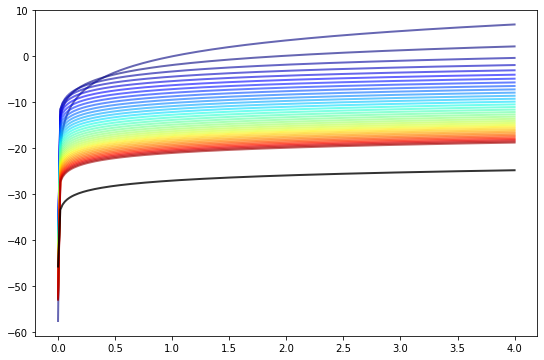

In [65]:
v = 5 * np.log(grid)
n =35

fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(grid, v, color=plt.cm.jet(0),
       lw=2, alpha=0.6, label='Initial condition')

for i in range(n):
    v = T(v)
    ax.plot(grid, v, color=plt.cm.jet(i/n), lw=2, alpha=0.6)  # color=plt.cm.jet(i/n) (what/why)
    
ax.plot(grid, v_star(grid, α, β, μ), 'k-', lw=2,
       alpha=0.8, label='True value function')


Step 2.3: write a functiion that iterates until the difference is below a particular tolerence level.

We can check the result by plotting it against the true value.

In [66]:
def solve_model(og,
               use_parallel=True,
               tol=1e-4,
               max_iter=1000,
               verbose=True,
               print_skip=25):
    T, _ = operator_factory(og, parallel_flag=use_parallel)
    
    v = np.log(og.grid)
    i = 0
    error = tol + 1
    while i < max_iter and error > tol:
        v_new = T(v)
        error = np.max(np.abs(v - v_new))
        i += 1
        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")
        v = v_new
        
    if i == max_iter:
        print("Failed to converge!")
        
    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")
        
    return v_new

Error at iteration 25 is 0.4141214878012889.
Error at iteration 50 is 0.14924362505009725.
Error at iteration 75 is 0.05378691247723566.
Error at iteration 100 is 0.019384626666749227.
Error at iteration 125 is 0.006986155808359484.
Error at iteration 150 is 0.0025177876167887803.
Error at iteration 175 is 0.0009074024203314934.
Error at iteration 200 is 0.0003270248425657485.
Error at iteration 225 is 0.00011785870911751317.

Converged in 230 iterations.


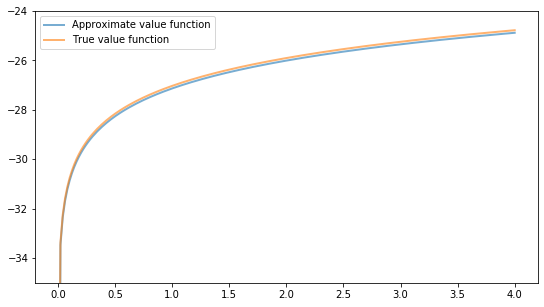

In [67]:
v_solution = solve_model(og)

fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(grid, v_solution, lw=2, alpha=0.6,
       label='Approximate value function')

ax.plot(grid, v_star(grid, α, β, μ), lw=2,
       alpha=0.6, label='True value function')

ax.legend()
ax.set_ylim(-35, -24)
plt.show()

## 3.6 The policy function

Step 3: to compute an approximate optimal policy, we use the second function returned from *operator_factory* that backs out the optimal policy from the solution to the Bellman equation.

We will compare the result to the exact solution to the policy.

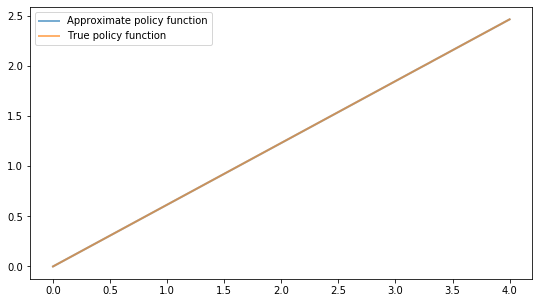

In [68]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(grid, get_greedy(v_solution), lw=2,
       alpha=0.6, label='Approximate policy function')

ax.plot(grid, σ_star(grid, α, β),
       lw=2, alpha=0.6, label='True policy function')

ax.legend()
plt.show()

# 4 Exercises and solutions

## 4.1 Exercise

Once an optimal consumption policy $\sigma$ is given, income follows [(7)](#).

The next figure shows a simulation of 100 elements of this sequence for three different discount factors (and hence three different policies).

In each sequence, the initial condition is $y_0=0.1$. The discount factors are *discount_factors = (0.8, 0.9, 0.98)*.

We have also dialed down the shocks a bit with *s =0.05*.

Otherwise, the parameters and primitives are the same as the log-linear model discussed earlier in the lecture.

Notice that more patient agents typically have higher wealth.

Replicate the figure modulo randomness.

$$
y_{t+1} = f(y_t - \sigma (y_{t})) \xi_{t+1}, \ y_0 \ given
$$


1. $f(k)= k^{\alpha}$
2. $u(c)= \ln c$
3. $\phi$ is the distribution of $\exp (\mu + \sigma \zeta)$ when $\zeta$ is standard normal.

the optimal consumption policy is
$$
\sigma^* (y) = (1- \alpha \beta )y
$$

In [69]:
# method 1

# simulate income 
def simulate_og(σ_func, og, α, y0=0.1, ts_length=100):
    y = np.empty(ts_length) # ?ts_length (what/why)
    ξ = np.random.randn(ts_length-1) # ? (ts_lengthy-1) (what/why)
    y[0] = y0
    for t in range(ts_length-1):
        # 
        y[t+1] = (y[t] - σ_func(y[t]))**α * np.exp(og.μ + og.s * ξ[t]) # income patterns
    return y

In [70]:
# method 2


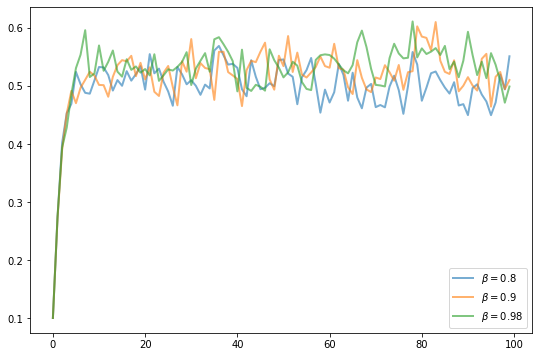

In [71]:
fig, ax = plt.subplots(figsize=(9,6))

for β in (0.8, 0.9, 0.98):
    og = OptimalGrowthModel(f, np.log, β=β, s=0.05) # ?
    grid = og.grid # ?
    
    v_solution = solve_model(og, verbose=False)
    
    σ_star = get_greedy(v_solution)   # ?
    σ_func = lambda x: interp(grid, σ_star, x) # ?
    y = simulate_og(σ_func, og, α)      # calculate income
    ax.plot(y, lw=2, alpha=0.6, label=rf'$\beta = {β}$')
    
ax.legend(loc='lower right')
plt.show()